<a href="https://colab.research.google.com/github/visiont3lab/machine_learning/blob/master/05-RegressioneEsempio/RegressionRecap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cosa facciamo oggi? 
<center><h1> Ripasso Regressione  usando il California Housing Dataset! </h1></center>

* Regression Lineare
* Regressione polinomiale
* Decision Tree 

# Dove troviamo i dataset? 
L'obbiettivo di oggi è quello di applicare gli algoritmi studiati sia di Regressione che di Classificazione a dei dataset un po' più corposi. L'idea è quella di cominciare ad affrontare problemi il più possibile vicini alla realtà. Per face ciò ci servono due dataset uno di regressione e uno di classificazione.
<center><h3> Dove troviamo i datasets? </h3></center>

* [Scikit-Learn Toy datasets](https://scikit-learn.org/stable/datasets/index.html#toy-datasets) 
* [Scikit-Learn Real World Dataset](https://scikit-learn.org/stable/datasets/index.html#real-world-datasets)
* [Altri dataset importabili usando Scikit-Learn](https://scikit-learn.org/stable/datasets/index.html#loading-other-datasets)
  * [OpenML Dataset](https://www.openml.org/search?type=data)
  * [LIBSVM Regression Dataset](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/)

[Datasets Scikit Learn Main Page](https://scikit-learn.org/stable/datasets/index.html)

* Classificazione: The Labeled Faces in the Wild face recognition dataset ([esempio](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py))
* Regressione:  California Housing dataset ([esempio](https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py))


## Regressione: California Housing dataset




### 0) Raccolta Informazioni e Link utili
* [Esempio Utile Regressione](https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py)
* [Stesso dataset leggermente aggiornato Kaggle](https://www.kaggle.com/camnugent/california-housing-prices)
* [Spiegazione dataset](https://scikit-learn.org/stable/datasets/index.html#real-world-datasets)

### 1) Comprensione del dataset




In [62]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

# Download dataset 
cal_housing = fetch_california_housing()

print(cal_housing.keys())
print(cal_housing.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the 


* Obbiettivo: Stimare qual'è il valore medio delle case in California.
* Dati: Input o Attribute Information:
    * MedInc:        media degli stipendi (annuale) delle persone che vivono nel quartiere in dollari per casa (unità di misura: decine di migliaia di dollari of US Dollars esempio: 8.3252 = 83252 dollari). Date N case in un quartiere, per ogni casa mi calcolo lo stipendio medio annuale e faccio la media.
    * HouseAge:      media dell'età delle persone che vivono nella casa. Un numero basso significa che l'edificio è nuovo. 
    * AveRooms:      numero medio camere per casa
    * AveBedrms:     numero medio di camere da letto per casa
    * Population:    numero di persone medio che vivono nel quartiere (block)
    * AveOccup:      numero mddio di persone che vivono in ogni casa 
    * Latitude:      latitudine della casa.Una misura che mi dice quanto una casa è a nord
    * Longitude:     longitudine della casa. Una misura che mi dice quanto una casa è ad ovest
* Target:
    * HousePrice:    valore della casa in centinaia di migliaia di dollari (esempio: 4.526 => 4.526*100*1000 = 452600.0)

### 2) Estrazione dati dal dataset e conversione a dataframe (pandas)

In [0]:
X = cal_housing['data']                  # or cal_housing.data
X_names = cal_housing['feature_names']   # or cal_housing.feature_names
Y = cal_housing['target']                # or cal_houseing.target
cal_housing.update([ ('target_names', ['HousePrice'])] )  # add missing names
Y_names =  cal_housing['target_names']   # cal_houseing.target_names


In [119]:
df_X = pd.DataFrame(data=X, columns =X_names)
df_Y = pd.DataFrame(data=Y, columns =Y_names)
display(df_X)
display(df_Y)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


,HousePrice
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


### 3) Considerazioni e analisi dei dati

#### Correlation Matrix: Quanto le variabili di input sono correlate? È utile applicare la PCA cioè ridurre il numero di input?
Il contenuto di informazioni delle variabili di input è omogeneo oppure vi sono variabili inutili?

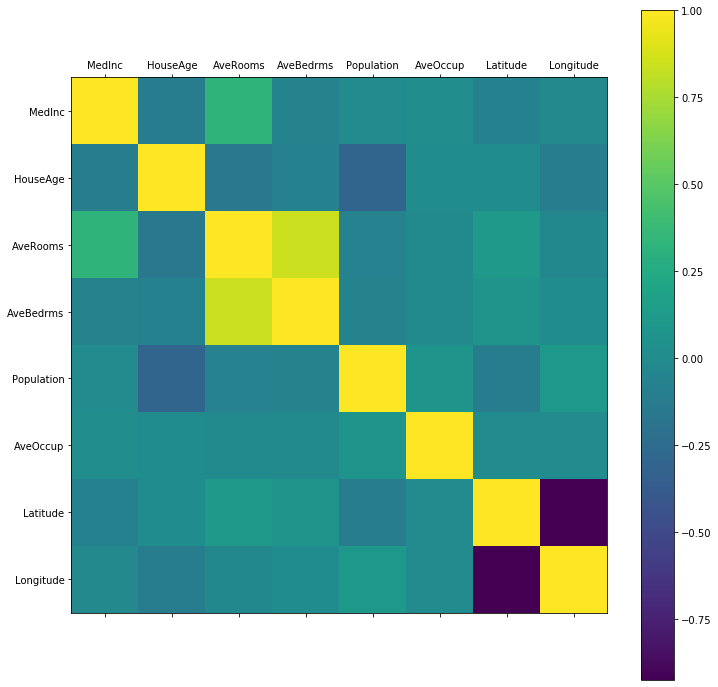

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [129]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 12]

# Correlation Matrix
plt.matshow(df_X.corr())
plt.xticks(range(len(df_X.columns)), df_X.columns)
plt.yticks(range(len(df_X.columns)), df_X.columns)
plt.colorbar()
plt.show()
display(df_X.corr())

### Grafici utili

* [Libreria Bamboolib Demo](https://bamboolib.8080labs.com/)

Non vi è ancora un integrazione con google-colab, in particolare vi è un errore di compatibilità, poichè Bamboolib richiede notebook>=5.3 mentre google-colab usa la versione 5.2.2.  

Al fine di utilizzare la libreria è necessario visitare la pagina [Ufficiale]((https://bamboolib.8080labs.com/) e premere su "Try the Live Demo".

Copiare nel notebook il seguente codice:
  ```python
  from sklearn.datasets import fetch_california_housing
  from sklearn.model_selection import train_test_split
  import pandas as pd

  # Download dataset 
  cal_housing = fetch_california_housing()
  cal_housing
  ```
Questo [Video Demo](https://www.youtube.com/watch?v=y5F4Brf7FBs) spiega come utilizzare graficamente la libreria. Inoltre c'è un un [interessante tutorial](https://towardsdatascience.com/bamboolib-learn-and-use-pandas-without-coding-23a7d3a94e1b)




### Preprocessamento
Non è sempre un buona idea normalizzare i dati perchè si perde l'informazione del massimo e del minimo. Tuttavia liner regression algoritmi come Support Vector Machine e Linear Regression convergono più velocemente su data normalizzati.

* StandarScaler: input data con mean value (valore medio) uguale a zero e deviazione standard uguale ad 1. 
* MinMaxScaler: scaliamo i dati in un range minimo massimo. Di solito da 0 a 1

La normalizzazione permetterà al nostro algoritmo di raggiungere la stima ottima in un tempo minore di quello che occorre se non normalizzaziamo.


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# --------- Standard Scaler Mean=0, Variance=1
data_X = StandardScaler().fit_transform(df_X.values)
df_X_preprocessed_SC = pd.DataFrame(data = data_X , columns = X_names)

# --------- Min Max Scaler Min=0, Max=1
data_X = MinMaxScaler().fit_transform(df_X.values)
df_X_preprocessed_MMS = pd.DataFrame(data = data_X , columns = X_names)

display(df_X.describe())
display(df_X_preprocessed_SC.describe())
display(df_X_preprocessed_MMS.describe())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,3.734255e-16,8.557001e-16,2.704111e-16,-1.531384e-16,-6.465442e-17,6.064808e-19,1.256263e-15,-6.527810e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4) Divisione del dataset in training e test

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(df_X.values, df_Y.values, test_size=0.1, random_state=0) # data not normalized
X_train_SC, X_test_SC, Y_train, Y_test = train_test_split(df_X_preprocessed_SC.values, df_Y.values, test_size=0.1, random_state=0) # normalize data standard scaler
X_train_MMS, X_test_MMS, Y_train, Y_test = train_test_split(df_X_preprocessed_MMS.values, df_Y.values, test_size=0.1, random_state=0) # normalize data minmax scaler

print("Training Input Dimensions: ", X_train.shape)
print("Training Output Dimensions: ", Y_train.shape)
print("Test Input Dimensions: ", X_test.shape)
print("Test Output Dimensions: ", Y_test.shape)

Training Input Dimensions:  (18576, 8)
Training Output Dimensions:  (18576, 1)
Test Input Dimensions:  (2064, 8)
Test Output Dimensions:  (2064, 1)


## 5) Scelta e applicazione del algoritmo di stima (Training and Validation)
* Esercizio scrivete l'mse
* Differenza tra mse, rmse e mae

### Metriche di valutazione

* [Spiegazione Sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

Metriche di misura dell'errore:
* Mean Squared Error: $MSE(Y,\hat{Y})=\frac{1}{n}{\sum^{n-1}_{i=0}}(Y_i -\hat{Y_i})^2 $ Sensibile agli outliers, derivabile
* Mean Absolute Error: $MAE(Y,\hat{Y})=\frac{1}{n}{\sum^{n-1}_{i=0}}|Y_i -\hat{Y_i}|$ Non derivabile
* Median Absolute Error: $MedAE(Y,\hat{Y})=median(|Y_0 -\hat{Y_0}|, ... , |Y_{n-1} -\hat{Y}_{n-1}|)$ dove la mediana è il valore che occupa la posizione centrale in una serie di dati ordinati in modo crescente ([Ulteriori Informazioni](https://www.youmath.it/lezioni/algebra-elementare/lezioni-di-algebra-e-aritmetica-per-scuole-medie/2064-media-moda-mediana.html). Non derivabile 

Metriche per misurare lo score del modello (valutare quanto il modello è buono):
  * Explained Variance Score: $EV(Y,\hat{Y})=1 - \frac{var(Y-\hat{Y})}{var(Y)}$ dove $var$ è un varianza biased cioè $Var(\hat{Y}−Y)=\frac{1}{n}\sum^{n-1}_{i=0}(e_i -e_m)^2$  dove $e_m$ rappresenta l errore medio calcolato su n campioni. [Ottima spiegazione](https://stats.stackexchange.com/questions/210168/what-is-the-difference-between-r2-and-variance-score-in-scikit-learn)
  * [R2 Score](https://it.wikipedia.org/wiki/Coefficiente_di_determinazione), [Video R2 Score Spiegazione](https://www.youtube.com/watch?v=2AQKmw14mHM)
  Quanta variazione in meno il nostro modello ottiene in percentuale (Res) rispetto al valore medio.  Quindi siamo in grado di coprire Res% della variazione del modello.
Quindi se R2 score = 0.9 possiamo dire molto bene la relazione tra Y_pred e Y esprime il 90% della variazione dei dati.

> **_IMPORTANTE:_** 
L'errore associato a un modello può essere decomposto in 3 elementi principali:
* Bias: Parte dell'errore dovuta a assunzioni sbagliate. Un bias alto è spesso sinonimo di mancanza di informazioni nei dati di input, pertanto un modello con bias alto tenderà a underfitting. 
* Variance: La varianza ci fornisce un indicazione di quanto il modello ottenuto sia sensibile a variazini nel dataset di training. Un modello ottenuto usando polynomial reggression avrà una varianza alta se il grado è elevato, pertanto avere una varianza alta è sinonimo di overfitting. Stiamo cercando di essere perfetti nel dataset di training a scapito della robustezza dell'algoritmo.
* Errore Irriducibile: Parte dell'errore dovuta alla rumorosità (noisiness) del dataset. L'unico mode per migliorare questa parte dell'errore è pulire i dati cercando di rimuove il più possibile gli outliers. (esempio errore dovuto a misure dei sensori sbagliate)


In [0]:
def my_mse(Y_test, Y_pred):
  num_samples = len(Y_test)
  acc = 0
  for i in range(0,num_samples):
    temp = (Y_pred[i]-Y_test[i])**2
    acc = temp + acc
  mse = acc/num_samples
  return mse


### Regressione Lineare

L'obbiettivo del regressore lineare è minimizzare la Residual Sum Square (RSS) che si esprime come $RSS =\sum_{i=1}^{n}(Y_{i}-\hat{Y}_{i})^{2}$

Computation time: 
--- 0.010934114456176758 seconds ---
--- 0.006644487380981445 seconds ---
--- 0.005028486251831055 seconds ---
TEST ERRORS: 
No Normalization : MSE:  0.536251980727768 RMSE:  0.7322922782112127 MAE:  0.5349313287784955 MedAE:  0.414523530910204
Standard Scaler : MSE:  0.5362519807277708 RMSE:  0.7322922782112146 MAE:  0.534931328778454 MedAE:  0.41452353090997196
Min Max Scaler : MSE:  0.5362519807277709 RMSE:  0.7322922782112146 MAE:  0.5349313287784562 MedAE:  0.41452353090998906
Validation R2 Score
R2:  0.6098033978087867 R2_SC:  0.6098033978087847 R2_MMS:  0.6098033978087847


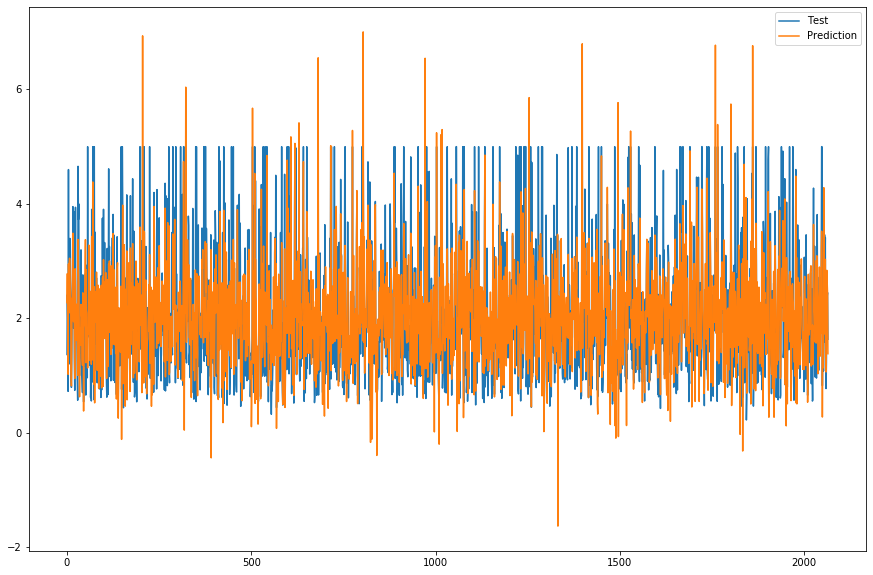

In [109]:
from sklearn import linear_model
# Error metrics
from sklearn.metrics import mean_squared_error  # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import median_absolute_error # MedAE

import numpy as np
import matplotlib.pyplot as plt
import time

plt.rcParams['figure.figsize'] = [15, 10]

def plot(Y_test,Y_pred):
  length = Y_pred.shape[0] # 20
  index_bar = np.linspace(0,length,length)
  plt.plot(index_bar, Y_test, label='Test')
  plt.plot(index_bar, Y_pred, label='Prediction')
  plt.legend()
  plt.show()

def validate(Y_test,Y_pred,name):
  mse = mean_squared_error(Y_test,Y_pred)
  rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
  mae = mean_absolute_error(Y_test,Y_pred)
  medae = median_absolute_error(Y_test,Y_pred)
  print( name, ": MSE: ", mse, "RMSE: ", rmse, "MAE: ", mae, "MedAE: ", medae)

# Init

#odel = linear_model.LinearRegression(fit_intercept=True, normalize=False)
#model = linear_model.TheilSenRegressor(random_state=42)
#model = linear_model.RANSACRegressor(random_state=42)
#model = linear_model.HuberRegressor()

m_linear = linear_model.LinearRegression(fit_intercept=True, normalize=False)
m_linear_SC = linear_model.LinearRegression(fit_intercept=True, normalize=False) 
m_linear_MMS = linear_model.LinearRegression(fit_intercept=True, normalize=False) 

# Train : Compare fitting time 
# Normalized data speed up regression 
print("Computation time: ")
start_time = time.time()
m_linear.fit(X_train,Y_train)
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
m_linear_SC.fit(X_train_SC,Y_train)
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
m_linear_MMS.fit(X_train_MMS,Y_train)
print("--- %s seconds ---" % (time.time() - start_time))

# Predict and test
# MSE fortemente influenzato dalgi outliers
Y_pred = m_linear.predict(X_test)
Y_pred_SC = m_linear_SC.predict(X_test_SC)
Y_pred_MMS = m_linear_MMS.predict(X_test_MMS)

print("TEST ERRORS: ")
validate(Y_test,Y_pred,"No Normalization")
validate(Y_test,Y_pred_SC, "Standard Scaler")
validate(Y_test,Y_pred_MMS, "Min Max Scaler")

print("Validation R2 Score")
R2 = m_linear.score(X_test, Y_test)
R2_SC = m_linear_SC.score(X_test_SC, Y_test)
R2_MMS = m_linear_MMS.score(X_test_MMS, Y_test) 
print("R2: ", R2, "R2_SC: ", R2_SC, "R2_MMS: ", R2_MMS)

# Error Analiysis (guardo sia training che test set)
#my_mse = my_mse(Y_test,Y_pred)
#sklearn_mse = mean_squared_error(Y_test,Y_pred)
#np_mse = np.sum( (Y_pred-Y_test)**2 ) / len(Y_test)
plot(Y_test,Y_pred_MMS)

###  Regressione Polinomiale

Con il termine Polynomial Features si vuole estendere il numero di input (X) con combinazini lineari di essi. Per esempio se abbiamo due input $X=[A,B]$ e scegliamo con grado polinomiale $degree=2$ avremo le seguenti combinazioni lineari: $X=[A, B, A^2, AB, B^2]$
Per approfondimenti leggere [questo esempio (Polynomial Interpolation)](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py)

> **_IMPORTANTE:_** Polynomial Features($degree=d$) transformano un array contenente $N$ elementi  ($X=[1,x_1, x_2, .. x_N]$) in  una array contenente $\frac{(N+d)!}{d!N!}$ elementi, dove $N!$ è il fattoriale di $N$ cioè $1\times2\times3\times4\times ..\times N$ e $d$ è i grado (degree) scelto.
Esempio: Grado=2 e Numero di input = 8:  $if \; d=2 \; e \; N=8 \; New\_Number = \frac{(N+d)!}{d!N!}=\frac{(8+2)!}{2!8!}=45$

D = 3 N = 8 New_Number = 165.0


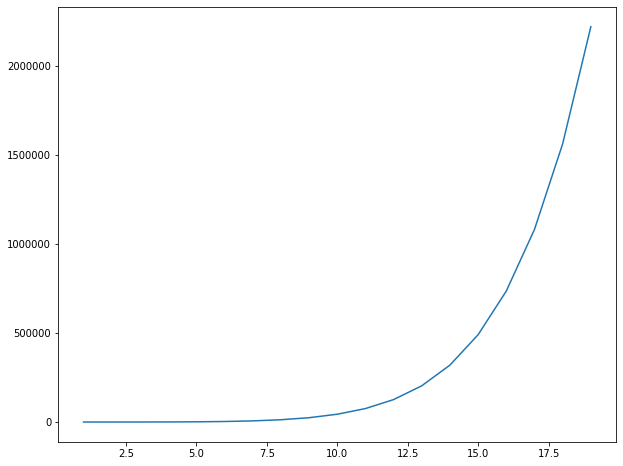

In [117]:
plt.rcParams['figure.figsize'] = [10, 8]
def fattorial(n):
    for i in range((n-1), 0, -1):        
       n = n * i 
    return n

d =3  # polynomial degree chosen
N=8   # number of input of the dataset
New_Number_Input = fattorial(d+N)/(fattorial(d)*fattorial(N))  # new number of inputs
print("D =",d,"N =",N,"New_Number =",New_Number_Input)

vec = []
N=8
L = 20
for i in range(1,L):
  d=i
  temp = fattorial(d+N)/(fattorial(d)*fattorial(N))
  vec.append(temp)
index_bar = np.linspace(1,L-1,L-1)
plt.plot(index_bar,np.array(vec))

Shape X_train vs X_train_Poly  (18576, 8) (18576, 44)
Shape X_test vs X_test_Poly  (2064, 8) (2064, 44)
MSE:  3.089024856355528 RMSE:  1.757562191319422 MAE:  0.49255883413194507 MedAE:  0.3342050319744629
R2_score:  -1.2476877407489155


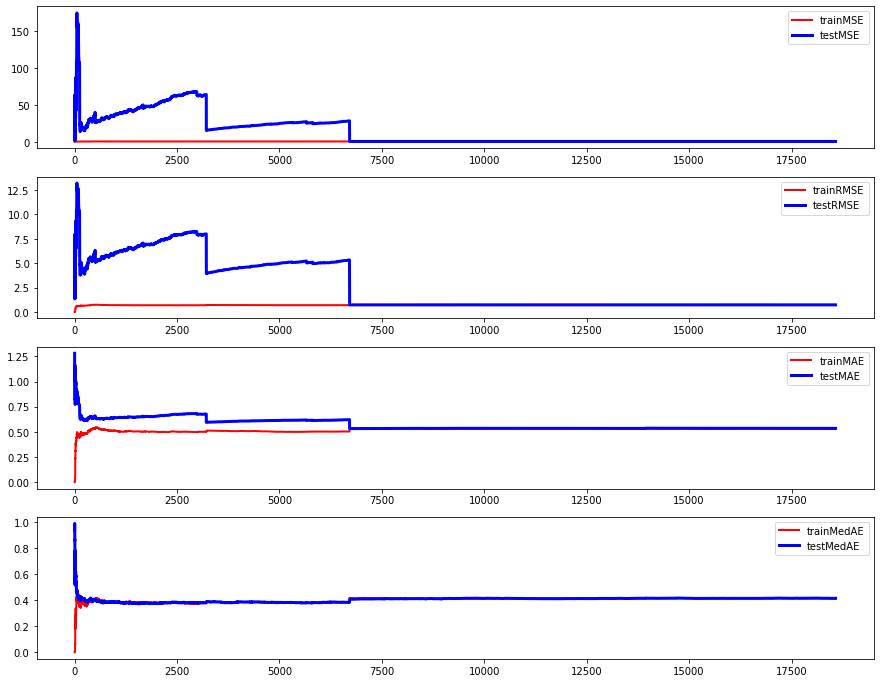

In [130]:
from sklearn import linear_model

# Error metrics
from sklearn.metrics import mean_squared_error  # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import median_absolute_error # MedAE

# Score metrics
from sklearn.metrics import explained_variance_score  # explained_variance_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import sys
#plt.rcParams['figure.figsize'] = [15, 10]

def plot(Y_test,Y_pred):
  length = Y_pred.shape[0]
  index_bar = np.linspace(0,length,length)
  plt.plot(index_bar, Y_test, label='Test')
  plt.plot(index_bar, Y_pred, label='Prediction')
  plt.legend()
  plt.show()

def plot_learning_curves(model,X_train,Y_train):
  train_mse, test_mse = [],[]
  train_mae, test_mae = [],[]
  train_medae, test_medae = [],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],Y_train[:m])
    Y_train_predict = model.predict(X_train[:m])
    Y_test_predict = model.predict(X_test)
    # MSE: Mean Square Error
    temp_train_mse = mean_squared_error(Y_train[:m],Y_train_predict)
    temp_test_mse = mean_squared_error(Y_test,Y_test_predict)
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)
    # MAE: Maean Absolute Error
    temp_train_mae = mean_absolute_error(Y_train[:m],Y_train_predict)
    temp_test_mae  = mean_absolute_error(Y_test,Y_test_predict)
    train_mae.append(temp_train_mae)
    test_mae.append(temp_test_mae)
    # MedAE: Median Absolaute Error
    temp_train_medae = median_absolute_error(Y_train[:m],Y_train_predict)
    temp_test_medae = median_absolute_error(Y_test,Y_test_predict)
    train_medae.append(temp_train_medae)
    test_medae.append(temp_test_medae)
    #print("-----------------")
    #print("Train MSE",np.round(temp_train_mse,2), "MAE: ", np.round(temp_train_mae,2), "MedAE: ",np.round(temp_train_medae,2))
    #print("Testt MSE",np.round(temp_test_mse,2),  "MAE: ", np.round(temp_test_mae,2), "MedAE: ", np.round(temp_test_medae,2))
    #print("-----------------")

  plt.subplot(411)
  plt.plot(train_mse, "r", linewidth=2, label='trainMSE')
  plt.plot(test_mse, "b", linewidth=3, label='testMSE')
  plt.legend()
  plt.subplot(412)
  plt.plot(np.sqrt(train_mse), "r", linewidth=2, label='trainRMSE')
  plt.plot(np.sqrt(test_mse), "b", linewidth=3, label='testRMSE')
  plt.legend()
  plt.subplot(413)
  plt.plot(train_mae, "r", linewidth=2, label='trainMAE')
  plt.plot(test_mae, "b", linewidth=3, label='testMAE')
  plt.legend()
  plt.subplot(414)
  plt.plot(train_medae, "r", linewidth=2, label='trainMedAE')
  plt.plot(test_medae, "b", linewidth=3, label='testMedAE')
  plt.legend()
  
# Init
m_poly = linear_model.LinearRegression(fit_intercept=True, normalize=False)
# Train using Polynomial features (linear combination of the features)
poly_features = PolynomialFeatures(degree=2,include_bias=False)
poly_features.fit(X_train)
X_train_Poly = poly_features.transform(X_train)
X_test_Poly = poly_features.transform(X_test)
print("Shape X_train vs X_train_Poly ", X_train.shape, X_train_Poly.shape)
print("Shape X_test vs X_test_Poly ",X_test.shape, X_test_Poly.shape)

m_poly.fit(X_train_Poly,Y_train)

# Predict
Y_pred = m_poly.predict(X_test_Poly)

# Error Analiysis
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
mae = mean_absolute_error(Y_test,Y_pred)
medae = median_absolute_error(Y_test,Y_pred)
print("MSE: ", mse, "RMSE: ", rmse, "MAE: ", mae, "MedAE: ", medae)

# Score Analysis
explained_variance = explained_variance_score(Y_test,Y_pred)
R2_score = m_poly.score(X_test_Poly, Y_test)
print("R2_score: ", R2_score)
plot_learning_curves(m_poly,X_train,Y_train)


# Error analisi
#plot(Y_test,Y_pred)

### Extra: Robust Linear Estimator (RANSAC, HUBER, THEILSEN)
[Esempio di referimento Robust Linear Estimation Fitting](https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py)
  * RANSAC Estimator (recommended) 
  * Huber Regressor
  * TheilSenRegressor

## 6) Predizione nel mondo reale (Test Real World)
Una volta creato il modello io devo saper rispondere alla domanda:
Quanto sarà il valore di una casa ( unità di misura: centinaia di miglia di euro) nel distretto californiano se nel 2009:

Al fine di predirre il costo medio delle case nel 2009 nel distretto californiamo dobbiamo prima di tutto raccimolare i seguenti dati:
  * MedInc = 3.5000 (decine di migliaia di dollari o 35000$)
   media degli stipendi (annuale) delle persone che vivono nel quartiere in dollari per casa (a famiglia)
  * HouseAge = (55+26)/2 = 40.5
  media dell'età delle persone che vivono nella casa. Un numero basso significa che l'edificio è nuovo. 
  * AveRooms = 3      
  numero medio camere per casa (rispetto a tutto il distretto)
  * AveBedrms = 2
  numero medio di camere da letto per casa
  * Population: 2100 abitanti 
  numero di persone medio che vivono nel quartiere (block)
  * AveOccup = 2      
  numero medio di persone che vivono in ogni casa 
  * Latitude = 10 leggermente fuori il centro     
   latitudine della casa.Una misura che mi dice quanto una casa è a nord
  * Longitude = -20
  longitudine della casa. Una misura che mi dice quanto una casa è ad ovest

In [116]:
# Attenzione alla perdita di significato
X_new_test = [[3.5,40.5,3,2,2100,2,37,-122]]
Y_pred_new = m_linear.predict(X_new_test)
print("Costo delal casa in centinai di miglia di dollari: ", Y_pred_new)

Costo delal casa in centinai di miglia di dollari:  [[3.31185486]]
